<a href="https://colab.research.google.com/github/TruongVuGoBrrrrr/BaiTapAI20104074/blob/BTVN-NhanDien/NhanDienGao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
train_image = '/content/drive/MyDrive/Data Train/Rice/Train'
valid_image = '/content/drive/MyDrive/Data Train/Rice/Val'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_datagen.flow_from_directory(train_image,target_size=(200,200),class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(valid_image,target_size=(200,200),class_mode='categorical')

Found 500 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [6]:
x_train,y_train=next(train_set)
x_train.shape

(32, 200, 200, 3)

In [7]:
y_train.shape

(32, 5)

In [8]:
label=['Arborio','Basmati','Ipsala','Jasmine','Karacadag']

In [9]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras.layers import Conv2D, MaxPooling2D

In [10]:
mod = models.Sequential()
mod.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))

In [11]:
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Flatten())
mod.add(Dense(128,activation='relu'))
mod.add(Dense(5,activation='softmax'))

In [12]:
mod.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history=mod.fit(train_set,epochs=20,batch_size=128,verbose=1, validation_data=validation_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/20
16/16 [==============================] - 194s 12s/step - loss: 1.2262 - accuracy: 0.4840 - val_loss: 0.5800 - val_accuracy: 0.8000
Epoch 2/20
16/16 [==============================] - 47s 3s/step - loss: 0.5438 - accuracy: 0.7640 - val_loss: 0.5022 - val_accuracy: 0.7600
Epoch 3/20
16/16 [==============================] - 47s 3s/step - loss: 0.4021 - accuracy: 0.8280 - val_loss: 0.5200 - val_accuracy: 0.7800
Epoch 4/20
16/16 [==============================] - 45s 3s/step - loss: 0.3865 - accuracy: 0.8300 - val_loss: 0.3288 - val_accuracy: 0.8900
Epoch 5/20
16/16 [==============================] - 43s 3s/step - loss: 0.3577 - accuracy: 0.8680 - val_loss: 0.3604 - val_accuracy: 0.8700
Epoch 6/20
16/16 [==============================] - 47s 3s/step - loss: 0.3812 - accuracy: 0.8480 - val_loss: 0.3582 - val_accuracy: 0.8600
Epoch 7/20
16/16 [==============================] - 45s 3s/step - loss: 0.3717 - accuracy: 0.8640 - val_loss: 0.2452 - val_accuracy: 0.9000
Epoch 8/20
16/16 [

In [13]:
mod.save('NhanDienGao.h5')

In [14]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import numpy as np
from keras.models import load_model
from matplotlib import pyplot as plt

1/1 [==============================] - 0s 72ms/step
[[5.5193465e-04 1.4205623e-01 2.4884488e-05 8.5736662e-01 3.3695048e-07]]
1/1 [==============================] - 0s 64ms/step
Đây là: Jasmine


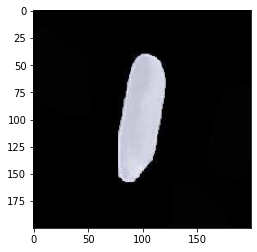

In [18]:
url='/content/Jasmine (1010).jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])

1/1 [==============================] - 0s 43ms/step
[[5.4725859e-04 1.2814745e-08 9.9944609e-01 3.1126067e-08 6.6958196e-06]]
1/1 [==============================] - 0s 41ms/step
Đây là: Ipsala


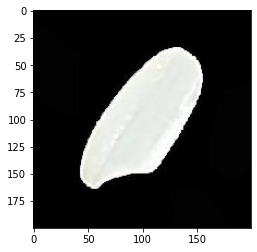

In [16]:
url='/content/Ipsala (746).jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])

1/1 [==============================] - 0s 41ms/step
[[8.2769930e-02 1.7305850e-07 1.4953618e-03 5.7617006e-05 9.1567695e-01]]
1/1 [==============================] - 0s 40ms/step
Đây là: Karacadag


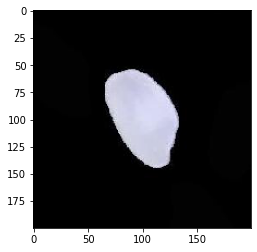

In [17]:
url='/content/Karacadag (172).jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])